In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

2024-04-04 22:10:54.106152: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 22:10:56.161850: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#load model
model = tf.keras.models.load_model('./models/object_detection.keras')
print('model loaded')

2024-04-04 22:10:58.642738: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-04 22:10:58.828472: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


model loaded


/home/sudhanshu/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 990 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [4]:
path = './images/newimg/image3.jpg'
image = load_img(path)
image = np.array(image,dtype=np.uint8)
image1 = load_img(path,target_size=(224,224))
img_arr_224 = img_to_array(image1)/255.0

In [5]:
#size of the origunal image
h,w,d = image.shape
print('Hieght of Image = ',h)
print('Width of Image = ',w)

Hieght of Image =  4608
Width of Image =  3456


In [6]:
#plt.figure(figsize=(10,20))
#plt.imshow(image)
#plt.show()

In [7]:
img_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = img_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
#make predictions
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


array([[0.29553205, 0.72544163, 0.31124935, 0.47743303]], dtype=float32)

In [10]:
#denormalize the values
denorm = np.array([w,w,h,h])
coords = denorm*coords
coords

array([[1021.35875702, 2507.12628937, 1434.23698425, 2200.01138306]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[1021, 2507, 1434, 2200]], dtype=int32)

(1021, 1434) (2507, 2200)


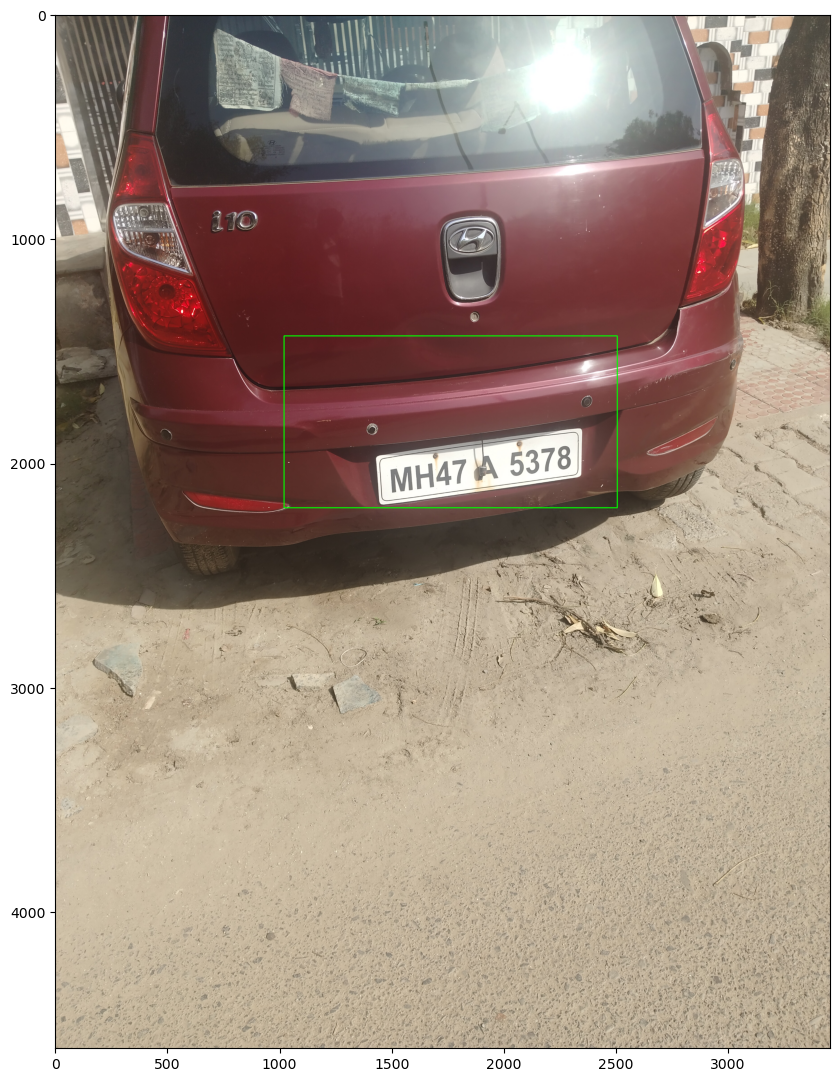

In [12]:
#draw boundingbox on top of image
xmin,xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1,pt2)

cv2.rectangle(image,pt1,pt2,(0,255,0),3)
plt.figure(figsize=(10,20))
plt.imshow(image)
plt.show()

In [13]:
#pipeline model
def object_detection(path):
    #read image
    image = load_img(path)
    image = np.array(image,dtype=np.uint8)
    image1 = load_img(path,target_size=(224,224))
    #data preprocessing
    img_arr_224 = img_to_array(image1)/255.0
    h,w,d = image.shape
    test_arr = img_arr_224.reshape(1,224,224,3)
    #make predictions
    coords = model.predict(test_arr)
    #denormalize the values
    denorm = np.array([w,w,h,h])
    coords = denorm*coords
    coords = coords.astype(np.int32)
    #draw boundingbox on top of image
    xmin,xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
(226, 247) (417, 301)


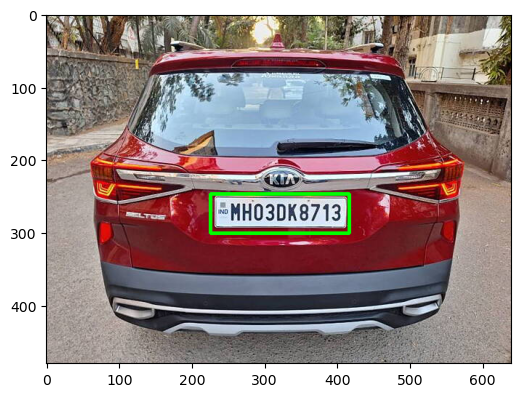

In [36]:
path = './Photos/car35.jpeg'
image,cods = object_detection(path)
plt.figure(figsize=(6,10))
plt.imshow(image)
plt.show()

#### Optical Character Recognition - OCR ###

In [59]:
import pytesseract as pt
import easyocr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
(245, 293) (380, 330)


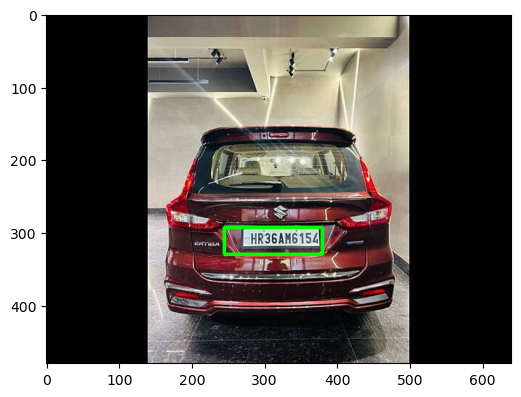

In [63]:
path = './images/detected/image21.jpg'
image,cods = object_detection(path)
plt.figure(figsize=(6,10))
plt.imshow(image)
plt.show()

In [64]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

<function matplotlib.pyplot.show(close=None, block=None)>

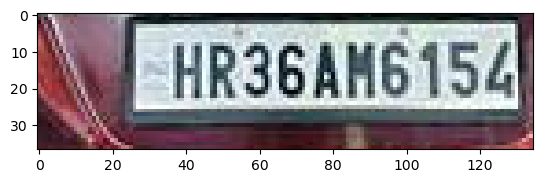

In [65]:
plt.imshow(roi)
plt.show

In [66]:
#extract text from image
text = pt.image_to_string(roi)
print(text)

  

HR36AN6 154}



In [67]:
reader = easyocr.Reader(['en'])
result = reader.readtext(roi)
text = result[0][-2]
text

'HR36AHG154'